In [61]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils.image_utils import img_to_array
from keras.utils import load_img
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
folder='/content/drive/MyDrive/Image/Train'

In [63]:
photos,labels = list(),list()

In [64]:
for file in listdir(folder):
  output=0.0
  if file.startswith('bongua'):
    output=1.0
  if file.startswith('borua'):
    output=2.0
  if file.startswith('buom'):
    output=3.0
  if file.startswith('chauchau'):
    output=4.0
  if file.startswith('chuonchuon'):
    output=5.0
  if file.startswith('kien'):
    output=6.0
  if file.startswith('ong'):
    output=7.0

  photo = load_img(folder+'/'+file,target_size=(100,100))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

In [65]:
photos = asarray(photos)
labels = asarray(labels)
save('/content/drive/MyDrive/CuoiKy_Ai/photo.npy',photos)
save('/content/drive/MyDrive/CuoiKy_Ai/label.npy',labels)

In [66]:
print(photos.shape)
print(labels.shape)

(749, 100, 100, 3)
(749,)


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
train_x, test_x, train_y,  test_y = train_test_split(photos,labels, test_size=0.3, train_size=0.7)

In [69]:
print(train_x.shape)
print(test_x.shape)

(524, 100, 100, 3)
(225, 100, 100, 3)


In [70]:
train_x = train_x.astype('float32')
train_x = train_x/255

In [71]:
test_x = test_x.astype('float32')
test_x = test_x/255

In [72]:
from keras.utils import to_categorical #One_hot_key
y_train = to_categorical(train_y)
y_test = to_categorical(test_y)

In [73]:
print(train_x.shape)
print(y_train.shape)

(524, 100, 100, 3)
(524, 8)


In [74]:
from keras import Sequential,Model,Input
from keras.layers import Dense,Flatten,Dropout, Conv2D, MaxPooling2D,Normalization
from keras.optimizers import Adam

In [75]:
batch_size = 100
epochs = 10
classes = 8 #7 đầu ra thì lớp là 8 để biển diễn được lớp thứ 0 #Số lớp ảnh

In [76]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(100,100,3),padding='same'))

In [77]:
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

In [78]:
model.add(Flatten())

In [79]:
model.add(Dense(700,activation='linear'))
model.add(Dropout(0.5))
model.add(Dense(classes,activation='softmax'))

In [80]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                  

In [81]:
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics =['accuracy'])

In [82]:
train = model.fit(train_x,y_train,batch_size=100,epochs=700,verbose=1)
test_loss, test_acc = model.evaluate(test_x, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

Epoch 1/700
6/6 [==============================] - 1s 56ms/step - loss: 4.4319 - accuracy: 0.1927
Epoch 2/700
6/6 [==============================] - 0s 39ms/step - loss: 1.8590 - accuracy: 0.3187
Epoch 3/700
6/6 [==============================] - 0s 39ms/step - loss: 1.5160 - accuracy: 0.4847
Epoch 4/700
6/6 [==============================] - 0s 39ms/step - loss: 1.3205 - accuracy: 0.5324
Epoch 5/700
6/6 [==============================] - 0s 41ms/step - loss: 1.1954 - accuracy: 0.5992
Epoch 6/700
6/6 [==============================] - 0s 40ms/step - loss: 1.0926 - accuracy: 0.6031
Epoch 7/700
6/6 [==============================] - 0s 39ms/step - loss: 0.9226 - accuracy: 0.6947
Epoch 8/700
6/6 [==============================] - 0s 36ms/step - loss: 0.7883 - accuracy: 0.7347
Epoch 9/700
6/6 [==============================] - 0s 37ms/step - loss: 0.6528 - accuracy: 0.7824
Epoch 10/700
6/6 [==============================] - 0s 37ms/step - loss: 0.5646 - accuracy: 0.8187
Epoch 11/700
6/6 [=

In [83]:
# batch_size=50,epochs=500
# Accuracy: 0.644444465637207
# Loss: 4.6301469802856445

# batch_size=100,epochs=500
# Accuracy: 0.6888889074325562
# Loss: 3.169142723083496

# batch_size=100,epochs=1000
# Accuracy: 0.6977777481079102
# Loss: 3.9120078086853027
# Accuracy: 0.6933333277702332
# Loss: 5.732074737548828

# batch_size=150,epochs=1000
Accuracy: 0.6800000071525574
Loss: 3.6144747734069824

# # batch_size=100,epochs=1500
# Accuracy: 0.6000000238418579
# Loss: 11.552260398864746

In [90]:
model.save('/content/drive/MyDrive/CuoiKy_Ai/CuoiKy.h5')

1/1 [==============================] - 0s 113ms/step
[6]
Kiến


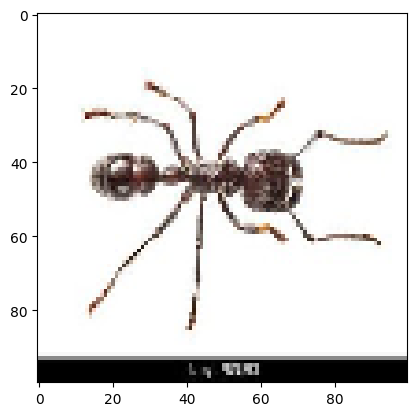

In [85]:
# #test mo hinh
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/drive/MyDrive/Image/Test/kien_20.jpg',target_size=(100,100,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3)
img = img.astype('float32')
img = img/255
a = np.argmax(model.predict(img),axis=-1)
print(a)
if(a == 1):
  print("Bọ ngựa")
if (a == 2):
  print("Bọ rùa")
if (a == 3):
  print("Bướm")
if (a == 4):
  print("Châu chấu")
if (a == 5):
  print("Chuồn chuồn")
if (a == 6):
  print("Kiến")
if (a == 7):
  print("Ong")


1/1 [==============================] - 0s 35ms/step
[7]
Ong


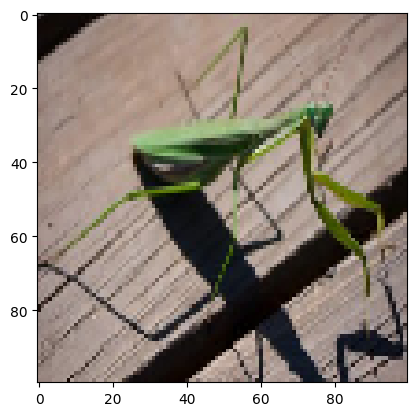

In [86]:
#test mo hinh
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/drive/MyDrive/Image/Test/bongua_14.jpg',target_size=(100,100,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3)
img = img.astype('float32')
img = img/255
a = np.argmax(model.predict(img),axis=-1)
print(a)
if(a == 1):
  print("Bọ ngựa")
if (a == 2):
  print("Bọ rùa")
if (a == 3):
  print("Bướm")
if (a == 4):
  print("Châu chấu")
if (a == 5):
  print("Chuồn chuồn")
if (a == 6):
  print("Kiến")
if (a == 7):
  print("Ong")

1/1 [==============================] - 0s 29ms/step
[2]
Bọ rùa


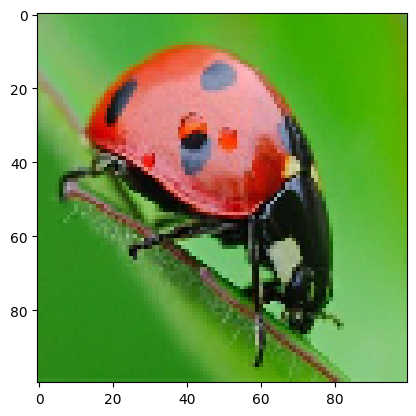

In [87]:
#test mo hinh
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/drive/MyDrive/Image/Test/borua_11.jpg',target_size=(100,100,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3)
img = img.astype('float32')
img = img/255
a = np.argmax(model.predict(img),axis=-1)
print(a)
if(a == 1):
  print("Bọ ngựa")
if (a == 2):
  print("Bọ rùa")
if (a == 3):
  print("Bướm")
if (a == 4):
  print("Châu chấu")
if (a == 5):
  print("Chuồn chuồn")
if (a == 6):
  print("Kiến")
if (a == 7):
  print("Ong")

1/1 [==============================] - 0s 28ms/step
[2]
Bọ rùa


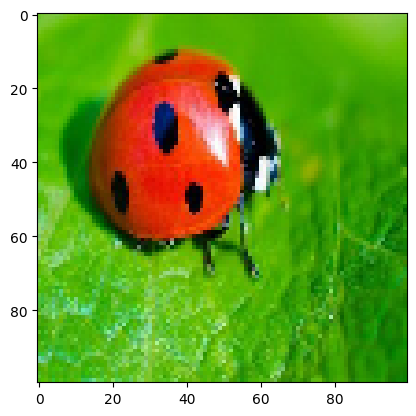

In [88]:
#test mo hinh
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/drive/MyDrive/Image/Test/borua_14.jpg',target_size=(100,100,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3)
img = img.astype('float32')
img = img/255
a = np.argmax(model.predict(img),axis=-1)
print(a)
if(a == 1):
  print("Bọ ngựa")
if (a == 2):
  print("Bọ rùa")
if (a == 3):
  print("Bướm")
if (a == 4):
  print("Châu chấu")
if (a == 5):
  print("Chuồn chuồn")
if (a == 6):
  print("Kiến")
if (a == 7):
  print("Ong")

1/1 [==============================] - 0s 30ms/step
[3]
Bướm


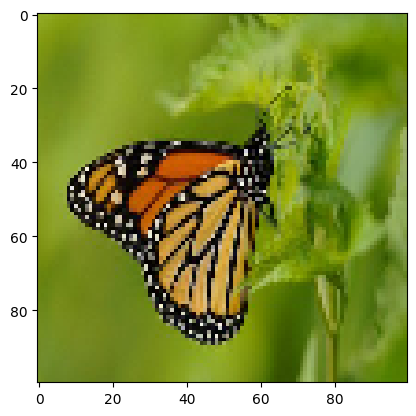

In [89]:
#test mo hinh
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/drive/MyDrive/Image/Test/buom_14.jpg',target_size=(100,100,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3)
img = img.astype('float32')
img = img/255
a = np.argmax(model.predict(img),axis=-1)
print(a)
if(a == 1):
  print("Bọ ngựa")
if (a == 2):
  print("Bọ rùa")
if (a == 3):
  print("Bướm")
if (a == 4):
  print("Châu chấu")
if (a == 5):
  print("Chuồn chuồn")
if (a == 6):
  print("Kiến")
if (a == 7):
  print("Ong")